In [329]:
# Importing essential libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [330]:
# Defining the file path for the Excel dataset
file_path = "E-commerce_data.xlsx"

# Reading all sheets from the Excel file into a dictionary
# Each key represents a sheet name, and the corresponding value is a DataFrame
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Displaying the names of all sheets found in the Excel file
print("Sheets found:", sheets_dict.keys())

Sheets found: dict_keys(['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants'])


In [331]:
# Selecting the main sheet to work with
main_sheet_name = "customers"
main_df = sheets_dict[main_sheet_name]

# Iterating through all sheets in the Excel file
for sheet_name, df in sheets_dict.items():
    if sheet_name != main_sheet_name:  # Skipping the main sheet itself

        # Identifying common columns between the main DataFrame and the current sheet
        common_cols = list(set(main_df.columns) & set(df.columns))

        if common_cols:  # Proceed only if there are common columns
            print(f"Merging {sheet_name} using columns: {common_cols}")

            # Merging the current sheet's DataFrame into the main DataFrame using common columns
            main_df = main_df.merge(df, on=common_cols, how="left")

Merging genders using columns: ['gender_id']
Merging cities using columns: ['city_id']
Merging transactions using columns: ['customer_id']
Merging branches using columns: ['branch_id']
Merging merchants using columns: ['merchant_id']


In [332]:
# Displaying the first few rows of the merged DataFrame to inspect the results
main_df.head(10)

,customer_id,join_date,city_id,gender_id,gender_name,city_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,merchant_id,merchant_name
0,1,2022-01-08,7,1,Male,Mansoura,178.0,2022-07-30,subscribed,SrP-866,NaT,8.0,20.0,Griffin-Leblanc
1,1,2022-01-08,7,1,Male,Mansoura,257.0,2022-09-19,burned,krI-075,2022-11-05,1.0,11.0,"Smith, Lawson and Hernandez"
2,1,2022-01-08,7,1,Male,Mansoura,1652.0,2022-06-09,burned,quk-137,2022-07-19,6.0,15.0,Butler-Gomez
3,1,2022-01-08,7,1,Male,Mansoura,1929.0,2022-07-30,burned,QiG-754,2022-10-18,8.0,20.0,Griffin-Leblanc
4,1,2022-01-08,7,1,Male,Mansoura,2352.0,2023-03-24,subscribed,OtC-985,NaT,4.0,15.0,Butler-Gomez
5,1,2022-01-08,7,1,Male,Mansoura,3176.0,2022-02-14,subscribed,nrL-913,NaT,2.0,18.0,Lewis LLC
6,1,2022-01-08,7,1,Male,Mansoura,4574.0,2024-05-26,subscribed,AFy-893,NaT,7.0,7.0,Berry-Anderson
7,2,2023-05-02,20,2,Female,Sohag,89.0,2023-10-21,subscribed,SSV-196,NaT,4.0,15.0,Butler-Gomez
8,2,2023-05-02,20,2,Female,Sohag,400.0,2023-05-21,burned,qPZ-662,2023-05-25,10.0,13.0,Thomas-Nelson
9,2,2023-05-02,20,2,Female,Sohag,4532.0,2023-08-04,subscribed,pOl-407,NaT,3.0,8.0,Medina-Foster


In [333]:
# Dropping unnecessary columns that contain IDs (city_id, gender_id, and merchant_id)
# These columns are replaced by more meaningful information (such as city name, gender, and merchant name),
# which provides more clarity and makes the dataset easier to analyze and interpret.
# Removing these ID columns helps simplify the data and avoid redundancy.
main_df.drop(['city_id', 'gender_id', 'merchant_id'], axis=1, inplace=True)

In [334]:
# Displaying information about the DataFrame including the number of entries, column names,
# non-null counts, and data types to verify the structure of the data after cleaning and merging.
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5011 non-null   int64         
 1   join_date           5011 non-null   datetime64[ns]
 2   gender_name         5011 non-null   object        
 3   city_name           5011 non-null   object        
 4   transaction_id      5000 non-null   float64       
 5   transaction_date    5000 non-null   datetime64[ns]
 6   transaction_status  5000 non-null   object        
 7   coupon_name         5000 non-null   object        
 8   burn_date           2516 non-null   datetime64[ns]
 9   branch_id           5000 non-null   float64       
 10  merchant_name       5000 non-null   object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 430.8+ KB


In [335]:
# Changing the data type of specific columns to 'object'
# This is useful for ensuring that the columns are treated as categorical data.
main_df['customer_id'] = main_df['customer_id'].astype(object)
main_df['transaction_id'] = main_df['transaction_id'].astype(object)
main_df['branch_id'] = main_df['branch_id'].astype(object)

In [337]:
# Checking for duplicate rows in the DataFrame
main_df.duplicated().sum()

0

- No duplicate rows found in the DataFrame.  
- This indicates that all rows in the dataset are unique and there are no repeated entries, which is good for ensuring data quality and accuracy in analysis.


In [338]:
# Checking for missing values in each column of the DataFrame
main_df.isna().sum()

,0
customer_id,0
join_date,0
gender_name,0
city_name,0
transaction_id,11
transaction_date,11
transaction_status,11
coupon_name,11
burn_date,2495
branch_id,11


- The output shows that there are missing values in some columns, specifically 'transaction_id', 'transaction_date', 'transaction_status', 'coupon_name', 'burn_date', 'branch_id', and 'merchant_name'.
- However, despite the presence of missing values, these columns are essential for the analysis and cannot be ignored or modified,
- as they contain valuable information for understanding customer behavior, transaction details, and other key aspects of the e-commerce data.
- Therefore, I will retain these columns and will handle the missing values carefully during the analysis process.


In [339]:
# Calculating the percentage of customers who have not made any transaction
num_customers_without_transaction = main_df['transaction_id'].isna().sum()
percentage_no_transaction = (num_customers_without_transaction / len(main_df)) * 100

print(f"Percentage of customers who have not purchased any coupon: {percentage_no_transaction:.2f}%")

Percentage of customers who have not purchased any coupon: 0.22%


- The 0.22% indicates that only a small fraction of customers have not purchased any coupon.
- This suggests that most customers engage with promotional offers and coupons, highlighting a positive response to marketing efforts.
- However, the 0.22% who have not made any coupon purchases could represent a target group for further engagement and promotional strategies.
- This group may require additional incentives or tailored marketing to encourage them to purchase coupons.

In [340]:
# filter the dataframe to get only customers who have not made any transactions (no coupon purchase)
customers_without_coupon = main_df[main_df['transaction_id'].isna()]

# Checking the distribution of customers by gender who have not purchased any coupon
gender_distribution = customers_without_coupon['gender_name'].value_counts()

# Checking the distribution of customers by city who have not purchased any coupon
city_distribution = customers_without_coupon['city_name'].value_counts()

print("Gender distribution of customers who haven't purchased any coupon:\n", gender_distribution)

print("\nCity distribution of customers who haven't purchased any coupon:\n", city_distribution)

Gender distribution of customers who haven't purchased any coupon:
 gender_name
Female    6
Male      5
Name: count, dtype: int64

City distribution of customers who haven't purchased any coupon:
 city_name
Beni Suef           3
Ismailia            2
Shubra El-Kheima    2
Fayyum              1
Alexandria          1
Cairo               1
Qena                1
Name: count, dtype: int64


- Gender Distribution:
The gender distribution of customers who haven’t purchased any coupon is quite balanced:

  - 6 females and 5 males have not made any coupon purchases.
  - This suggests that gender may not play a significant role in determining whether a customer purchases coupons or not.
  - However, the small sample size means further analysis could be needed to make definitive conclusions.

- City Distribution:
The distribution of customers across different cities reveals the following:

  - Beni Suef has the highest number of customers (3), followed by Ismailia and Shubra El-Kheima (each with 2 customers).
  - Other cities such as Fayyum, Alexandria, Cairo, and Qena have only 1 customer each.
  - This suggests that certain cities (such as Beni Suef) may have a higher concentration of customers who are not engaging with coupons, which could be a target area for promotional efforts.

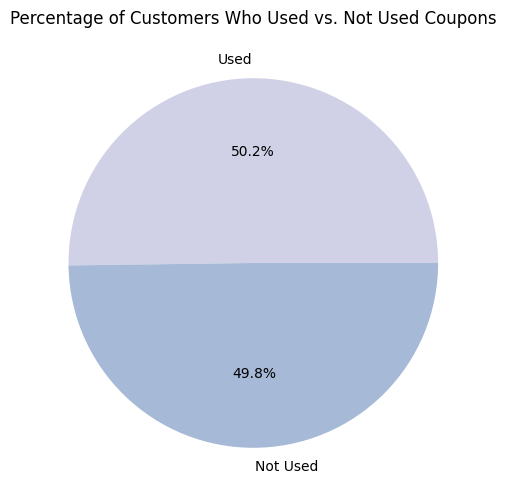

In [341]:
# Analyzing the percentage of coupons that have not been burned (the ones with no burn_date)
# Comparing customers who used coupons with those who did not
main_df['used_coupon'] = main_df['burn_date'].notna().map({True: 'Used', False: 'Not Used'})

# Plotting a pie chart to compare the percentage of customers who used coupons vs. those who did not
# The pie chart shows the distribution of coupon usage (Used vs. Not Used)
plt.figure(figsize=(6, 6))
main_df['used_coupon'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#D0D1E6', '#A6B9D6'])
plt.title('Percentage of Customers Who Used vs. Not Used Coupons')
plt.ylabel('')
plt.show()


- 49.8% of the coupons have not been burned yet, which indicates that almost half of the coupons issued have not been redeemed or utilized by customers.

- This could suggest that a significant portion of customers are not using their coupons, which might imply:

  - Low redemption rates: Customers may not be motivated to use the coupons, or they might forget to redeem them.
  - Coupon expiration: Coupons might be expiring before customers can use them, or the burning process might not be happening effectively.

- Actionable Insights:

  - There could be an opportunity to re-engage customers with reminders or incentives to use their coupons before they expire.
  - It might be useful to segment customers who have not redeemed their coupons to identify patterns and better understand why they're not being used.
  - Adjusting marketing strategies to encourage customers to redeem coupons, such as sending reminder emails or offering limited-time promotions, could be beneficial.

- On the other hand, 50.2% of the coupons have been redeemed, indicating that half of the issued coupons are being used by customers.

- This could suggest:

  - Effective coupon usage: A significant portion of customers are utilizing the coupons, which could be a result of successful promotional efforts, customer awareness, or the coupons being attractive to the recipients.
  - Targeted customer base: The group that is redeeming coupons may have a higher level of engagement with the brand, indicating that they are more likely to respond to marketing efforts, promotions, and discounts.

<ipython-input-342-f970b5f414de>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




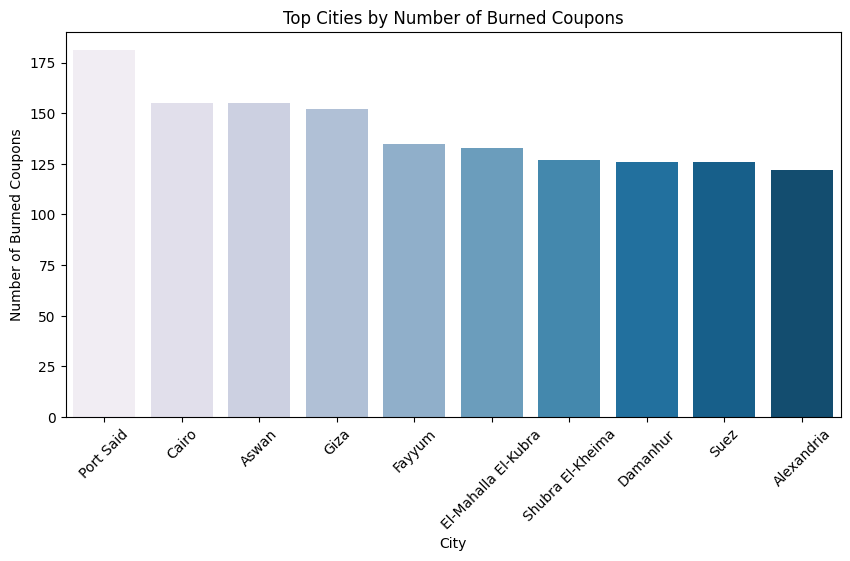

In [342]:
# Analyzing the most active cities in coupon redemption
# focusing only on the cities where coupons have been redeemed (burned)
top_cities = main_df.dropna(subset=['burn_date'])['city_name'].value_counts().head(10)

# Creating a bar plot to visualize the top 10 cities with the most coupon redemptions (burned coupons)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="PuBu")
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Burned Coupons')
plt.title('Top Cities by Number of Burned Coupons')
plt.show()

- Most Active Cities in Coupon Redemption:

  - Port Said ranks first in terms of burned coupons, indicating that it is the most active city in utilizing coupons or engaging with promotional offers. This suggests strong customer engagement and effective marketing strategies in this region.
  - Cairo, being the capital and one of the largest cities, follows closely. The large population and significant marketing efforts likely contribute to the high redemption rates observed in Cairo, reflecting the substantial consumer activity in the city.
  - Aswan and Giza also rank high in terms of coupon usage. This may indicate that targeted marketing or local promotional efforts in these areas are yielding positive results, driving increased engagement from consumers.

- Least Active Cities:

   - Alexandria and Suez occupy the lower ranks in terms of burned coupons, which could imply lower marketing or consumer activity in these cities compared to regions like Port Said or Cairo. These cities may benefit from more focused or tailored marketing strategies to boost coupon redemption and consumer engagement.

- The analysis shows a geographic concentration of promotional activity, with Port Said and Cairo leading in coupon redemptions. This suggests that marketing campaigns in these regions are more effective or that consumers in these areas are more engaged with promotional offers.
- On the other hand, cities like Alexandria appear to have less engagement, which could be due to less effective promotional strategies or different consumer behaviors in these areas. This disparity highlights the potential need for region-specific marketing tactics that cater to local preferences and increase overall coupon usage.

In [343]:
# Calculate the number of burned coupons over time, by aggregating the data monthly
# Removed missing values in 'burn_date'
# Then grouped the data by month
burned_coupons_per_month = main_df.dropna(subset=['burn_date']).groupby(main_df['transaction_date'].dt.to_period('M')).size().reset_index(name='burned_coupons')

# Convert 'transaction_date' column to string format for plotting
burned_coupons_per_month['transaction_date'] = burned_coupons_per_month['transaction_date'].astype(str)

# Plot the data using Plotly
fig = px.line(burned_coupons_per_month, x='transaction_date', y='burned_coupons',
              title='Burned Coupons Over Time',
              labels={'transaction_date': 'Month', 'burned_coupons': 'Number of Burned Coupons'},
              markers=True)

fig.update_traces(line=dict(color='#003366'))

fig.update_xaxes(tickangle=45)

fig.show()

- The data indicates a noticeable increase in the number of burned coupons over time, with a consistent rise in the recent months. This increase may reflect the ongoing success of promotional strategies and a rise in customer engagement.

- Despite the overall upward trend, there are significant monthly fluctuations. For instance, certain months experienced a notable decrease in the number of burned coupons (such as August 2021). These fluctuations could be related to seasonal factors or changes in promotional offers.

- On the other hand, certain months saw substantial increases (such as September 2022 and December 2023), suggesting seasonal effects or special marketing campaigns during these periods.

- Peak activity: The highest number of burned coupons was recorded in June 2024 (260 coupons), which could reflect the success of promotional campaigns or increased demand during that month.

- Lowest activity: Conversely, August 2021 saw the lowest number of burned coupons (2 coupons), which may have been due to a lack of offers or weak engagement with the campaign during that period.

- A significant increase in burned coupons was observed in the last quarter of 2023 (from 67 in September to 103 in December). This increase could be linked to the end-of-year period, special promotions, or seasonal factors leading to a higher demand for coupons.

- The beginning of 2024 saw a notable rise in the number of burned coupons, with 130 coupons recorded in January and an increase to 260 in June. This suggests a strong rise in customer engagement or improvements in promotional strategies, reflecting solid performance in the first half of the year.

- It is essential to focus on the months with lower performance (such as August 2021 and November 2022) by analyzing the reasons behind the decline, such as fewer offers or weak engagement.

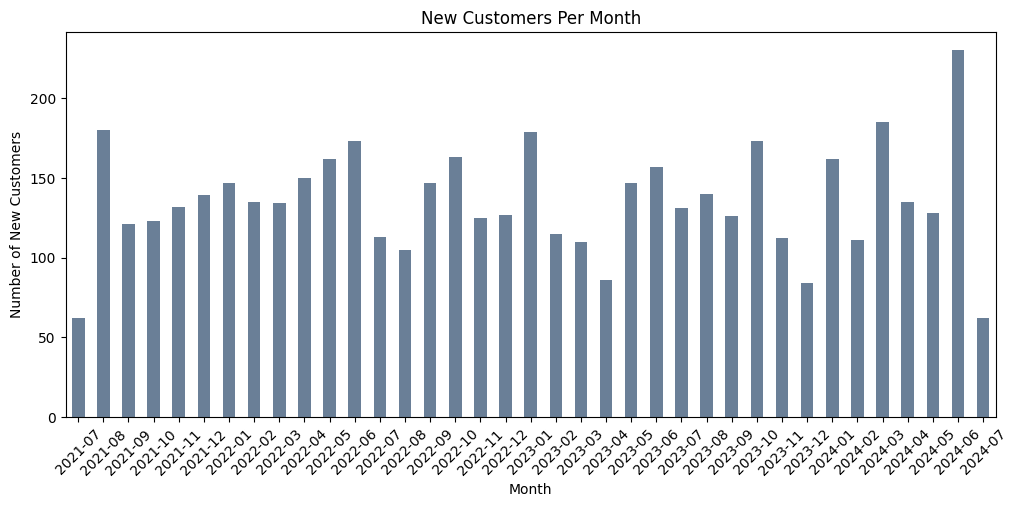

In [344]:
# Analyzing the success of the marketing campaign in attracting new customers over time.
# Analyzing the number of new customers per month
new_customers_per_month = main_df.groupby(main_df['join_date'].dt.to_period('M')).size()

# Plot the time series as a bar chart
# This visualization shows the number of new customers acquired each month, providing insights into trends.
plt.figure(figsize=(12, 5))
new_customers_per_month.plot(kind='bar', color='#6A7F97')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('New Customers Per Month')
plt.xticks(rotation=45)
plt.show()

- There are some months with notable increases or decreases. For example, in June 2024, there was a significant increase in the number of new customers (230 customers) compared to the previous months.
- Also, in December 2023, the number was much lower (84 customers), which could indicate that December is a less active month (possibly due to holidays or other seasonal factors).
- There is a general trend of increasing new customers over time, especially after mid-2023. In the last few months, we have noticed continuous increases.
- Some months, like August 2021 (180 customers), saw significant increases in the number of new customers, which may suggest a successful marketing campaign or a peak sales season.
- There may also be months with noticeable declines, such as July 2021 (62 customers) and November 2022 (125 customers). These data can help identify the factors contributing to these declines, such as less active periods in business or seasonal factors.
- The period from April 2023 to May 2023 shows some decline in new customers compared to previous months. These periods can be studied to identify the reasons behind this drop and if strategies can be implemented to increase the number of customers during these periods.
- There is relative stability in some months, meaning that the business or product maintains a steady rate of new customers, like January 2022 (147 customers) and April 2022 (150 customers).
- Stability during these periods may indicate a steady customer base, or at least no significant decline in the number of new customers.

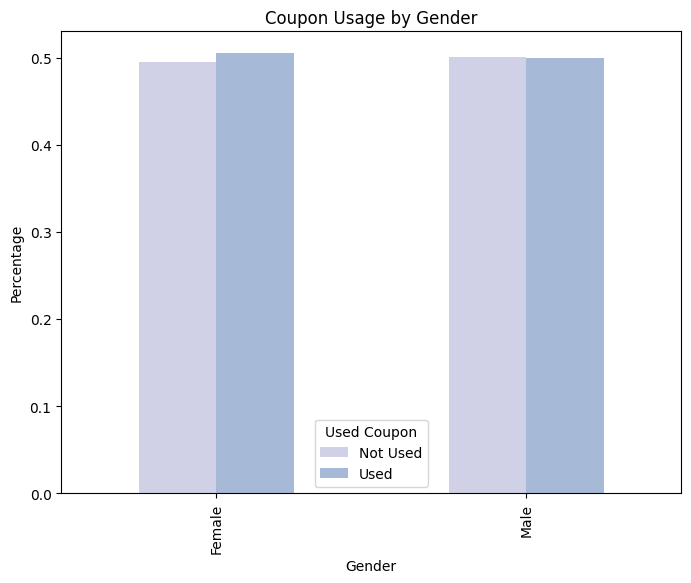

In [345]:
# Illustrating whether there is a difference in coupon usage between males and females.
# Group the data by gender and calculate the normalized count of 'used_coupon' for each gender
gender_usage = main_df.groupby('gender_name')['used_coupon'].value_counts(normalize=True).unstack()

gender_usage.plot(kind='bar', figsize=(8, 6), color=['#D0D1E6', '#A6B9D6'])
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Coupon Usage by Gender')
plt.legend(title='Used Coupon')
plt.show()

- For females: 50% of females used the coupons, while 49.5% did not use them.
- For males: 50% of males used the coupons, while 50% did not use them.
- The percentages between males and females are very similar in terms of coupon usage. Therefore, it can be said that gender is not a significant factor in the decision to use coupons.
- Since coupon usage is balanced between genders, marketing strategies that rely on coupons should target both genders similarly.
- Considering that there is a percentage close to 50% that did not use the coupons for both genders, additional strategies can be considered to increase usage, such as improving the offers or providing extra incentives.

In [346]:
# Identify the merchants that attract customers to use coupons.
# Calculating the number of burned coupons for each merchant
top_merchants = main_df.dropna(subset=['burn_date'])['merchant_name'].value_counts().head(10)

fig = px.bar(
    x=top_merchants.index,
    y=top_merchants.values,
    labels={'x': 'Merchant', 'y': 'Number of Burned Coupons'},
    title='Top Merchants by Number of Burned Coupons',
    color=top_merchants.values,
    color_continuous_scale='PuBu'
)

fig.show()

- Thomas-Nelson has the highest number of burned coupons (533), indicating it is the most popular store among customers in terms of coupon usage.
- Butler-Gomez follows closely with 502 coupons, suggesting it is another highly successful merchant in attracting coupon users.
- Merchants like Smith, Lawson and Hernandez (266), Medina-Foster (257), and Campbell, Shaffer and Martinez (250) also have relatively high numbers of burned coupons, indicating they are also popular among customers for coupon redemption.
- The numbers significantly drop after the top two merchants. For example, the third-ranked merchant, Smith, Lawson and Hernandez, has 266 coupons burned, which is almost 50% fewer than Butler-Gomez. This indicates that only a small number of merchants are significantly contributing to coupon usage.
- Merchants with lower coupon burn counts (such as Griffin-Leblanc and Lewis LLC, with 236 and 234 respectively) could potentially benefit from targeted marketing campaigns to increase coupon redemption rates and drive more sales.

In [347]:
# Identifying the most loyal customers
# Selecting customers who made the highest number of transactions
transactions_per_customer = main_df.groupby('customer_id')['transaction_id'].count()
top_customers = transactions_per_customer.sort_values(ascending=False).head(10)

fig = px.pie(
    top_customers,
    names=top_customers.index,
    values=top_customers.values,
    title='Top 10 Loyal Customers',
    color_discrete_sequence=px.colors.sequential.PuBu
)

fig.show()

- This analysis can help identify the most loyal customers, allowing them to be targeted with promotional campaigns or special offers.
  - Each slice in the pie chart reflects the share of each customer in the total number of transactions.
  - The size of each slice depends on the number of transactions made by the customer compared to the other customers.

In [348]:
# Analysis of coupon distribution by branches
# Count the number of burned coupons for each branch
top_branches = main_df.dropna(subset=['burn_date'])['branch_id'].value_counts()

fig = px.bar(
    x=top_branches.index,
    y=top_branches.values,
    labels={'x': 'Branch ID', 'y': 'Number of Burned Coupons'},
    title='Branches by Coupon Usage',
    color=top_branches.values,
    color_continuous_scale='PuBu'
)

fig.show()

- This analysis helps in identifying the branches that are most engaged with promotional offers.

  - All branches are quite close in their coupon redemption activity, with the numbers ranging from 234 to 268 coupons. This suggests that coupon usage is somewhat evenly distributed across the branches, showing that no branch stands out significantly as either a major leader or a laggard in terms of coupon redemptions.

  - The spread of values (ranging from 234 to 268) indicates consistent engagement across all branches, with minimal variation. This could point to a uniform promotional strategy across branches or similar customer behavior at all locations.

- In the bar chart, each column represents a branch (identified by the "Branch ID").
- The height of each bar indicates the number of burned coupons associated with that specific branch.

In [349]:
# Identify which days are most popular for coupon use
# Extract the day of the week from the transaction date
main_df['transaction_day'] = main_df['transaction_date'].dt.day_name()

# Count the number of burned coupons for each day
coupons_by_day = main_df.dropna(subset=['burn_date'])['transaction_day'].value_counts()

fig = px.bar(
    x=coupons_by_day.index,
    y=coupons_by_day.values,
    labels={'x': 'Day of the Week', 'y': 'Number of Burned Coupons'},
    title='Coupon Usage by Day of the Week',
    color=coupons_by_day.values,
    color_continuous_scale='PuBu'
)

fig.show()

- This analysis shows the days of the week when customers use coupons the most, which helps in planning promotional offers.
  - Monday has the highest number of burned coupons (395), followed by Thursday (377) and Tuesday (373). This indicates that customers are most likely to use coupons at the beginning and middle of the workweek.
  - Saturday and Sunday both have a relatively high number of burned coupons (359 each), showing that coupon usage continues to be significant over the weekend.
  - Wednesday shows the lowest usage (317). This could suggest that customers are less likely to use coupons on this day, perhaps due to mid-week lulls in activity.
  - Since coupon usage is higher at the beginning of the week (Monday, Tuesday) and decreases slightly towards Wednesday, this could suggest that marketing teams might want to focus on more aggressive campaigns at the start of the week.
- Recommendations:

  - Focus on Monday to Tuesday for new offers and encourage mid-week use with incentives for Wednesday.
  - Maintain strong offers for Saturday and Sunday to keep customers engaged over the weekend.

In [350]:
# Seasonal Trends in Transactions Analysis
# Are there certain times during the year when demand is higher than usual?
# If there are peak months, marketing strategies can be improved based on this trend.

# Extracting the month from the transaction date
main_df['transaction_month'] = main_df['transaction_date'].dt.month

# Counting the number of transactions for each month
monthly_transactions = main_df.groupby('transaction_month')['transaction_id'].count()

fig = px.line(
    x=monthly_transactions.index,
    y=monthly_transactions.values,
    labels={'x': 'Month', 'y': 'Number of Transactions'},
    title='Seasonal Trends in Transactions',
    markers=True
)

fig.update_traces(line=dict(color='#003366'))

fig.show()

- June (month 6) stands out as the month with the highest number of transactions, reaching 739 transactions. This indicates a peak in activity, reflecting a noticeable increase in demand during this month.
- May (month 5) also exhibits high activity with 595 transactions, suggesting that spring and early summer months may be associated with stronger demand.
- On the other hand, August (month 8) shows the lowest number of transactions, with only 221 recorded. This could reflect a seasonal downturn, indicating that demand during the summer months may be lower compared to the rest of the year.
- Months like March (month 3), April (month 4), and July (month 7) demonstrate a stable demand, with transactions ranging from 453 to 594. This indicates consistent activity with little fluctuation in commercial activity during these months.
- It is evident that transactions are higher from January (month 1) to June (month 6), followed by a gradual decline in the second half of the year, particularly in August (month 8) and September (month 9). This suggests that engagement with promotions and commercial activity is more robust during the first half of the year, with a gradual dip in the second half.
- Recommendations:
  - Given the high activity in May and June, it would be advantageous to increase marketing efforts and promotional campaigns during these months to capitalize on the peak period.
  - As August sees a noticeable drop in transactions, consider implementing strategies to stimulate demand, such as targeted promotions or discounts to attract customers during this slower period.
  - For months with stable demand like March, April, and July, it’s important to maintain customer engagement through loyalty programs and consistent promotional activities to keep the business momentum going.

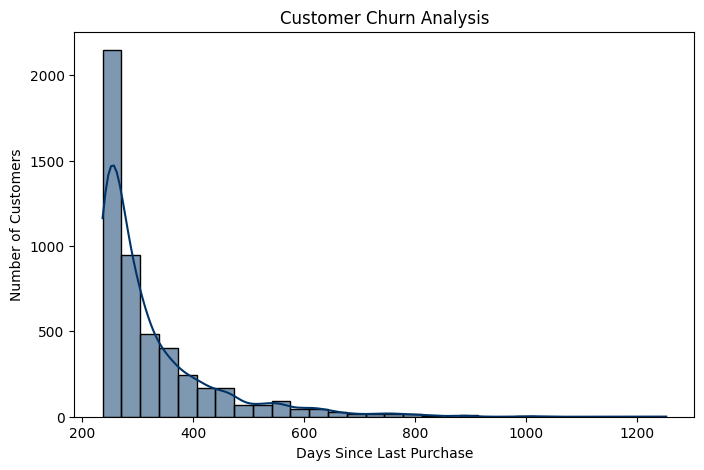

In [351]:
# Customer Churn Analysis
# Identify customers who stopped purchasing to understand the potential reasons.

# Calculate the days since the last purchase for each customer
last_transaction = main_df.groupby('customer_id')['transaction_date'].max()
main_df['days_since_last_purchase'] = (pd.to_datetime('today') - main_df['customer_id'].map(last_transaction)).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(main_df['days_since_last_purchase'], bins=30, kde=True, color='#003366')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Analysis')
plt.show()

- The chart indicates a decline in the number of customers as the number of days since their last purchase increases.

  - This suggests that while the majority of customers continue to make repeat purchases, there is a segment that ceases to engage after a certain period.

- Customers who have not made a purchase in a moderate period (e.g., 30 to 60 days) are considered at risk of churning.

  - These customers can be targeted with marketing campaigns or promotional offers to encourage re-engagement.

- Recommendations:

  - Target customers who have not purchased in a moderate period (e.g., 30 to 60 days) with promotional offers or reminder messages.

  - Focus on enhancing user experience and providing more attractive offers to retain customers.

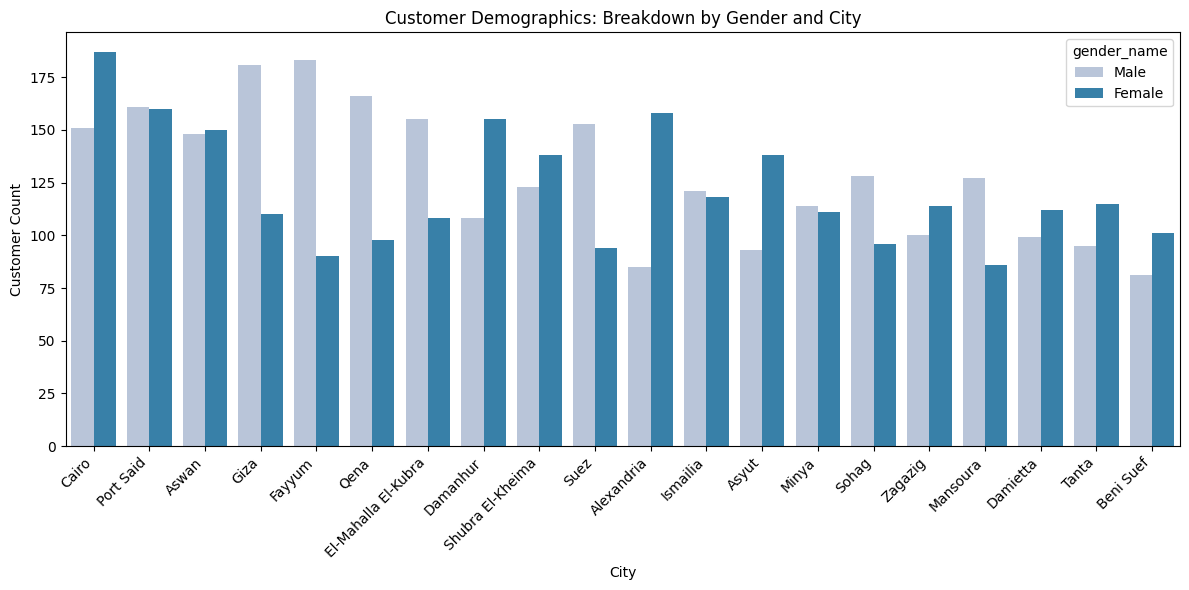

In [360]:
# showing the number of customers broken down by gender and city.
plt.figure(figsize=(12, 6))
sns.countplot(data=main_df, x='city_name', hue='gender_name', order=main_df['city_name'].value_counts().index, palette='PuBu')
plt.title('Customer Demographics: Breakdown by Gender and City')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()

- A notable gender distribution can be observed across various cities. The overall number of female customers surpasses male customers in several cities, but male customers are more prevalent in certain cities like Fayyum (183 males vs 90 females) and Giza (181 males vs 110 females). Conversely, cities like Cairo and Alexandria demonstrate a more balanced gender distribution, with females leading in both cities.

- Cairo emerges as the city with the highest overall customer base, with a total of 338 customers (187 females and 151 males), followed by Alexandria with 243 customers (158 females and 85 males). These cities show significant potential for business growth and customer engagement due to their large customer bases.

- Cities such as Shubra El-Kheima and Giza exhibit a relatively balanced gender distribution, which can be valuable when planning targeted marketing or customer engagement strategies that appeal equally to both genders.

- Cities like Mansoura (213 total customers) and Sohag (224 total customers) exhibit lower overall customer counts, suggesting potential for growth and market expansion. These regions could benefit from targeted efforts to increase customer acquisition.

- Cities with higher numbers of customers, particularly Cairo, Alexandria, and Port Said, indicate strong markets that could support customer retention initiatives. Further analysis could provide insights into the frequency of repeat customers and help inform loyalty programs.

- Regional trends suggest that Upper Egypt (e.g., Aswan, Sohag, Qena) tends to have a more substantial male customer base, while larger cities like Cairo and Alexandria show a more diversified customer demographic. This differentiation is critical for tailoring products, services, and promotional campaigns according to regional preferences.

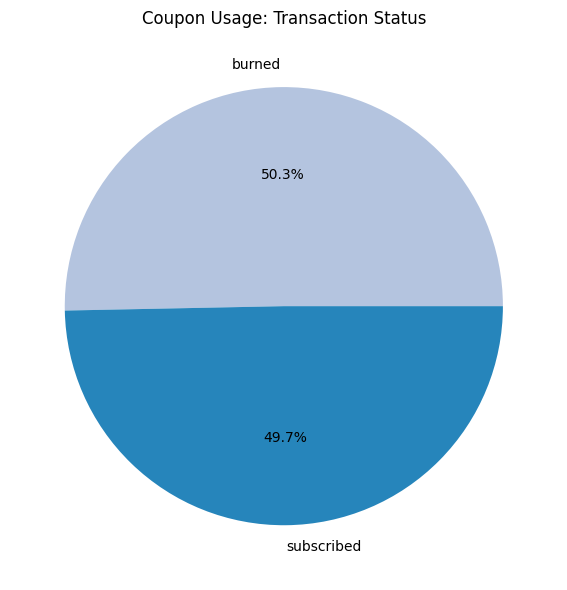

In [363]:
# showing the count of coupons based on the transaction_status (e.g., claimed vs. burned).
plt.figure(figsize=(8, 6))
status_counts = main_df['transaction_status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('PuBu', len(status_counts)))
plt.title('Coupon Usage: Transaction Status')
plt.tight_layout()
plt.show()

- The close balance between burned and subscribed coupons suggests that customers are using the coupons in a balanced way. This may indicate the effectiveness of the coupons in attracting customers, but it could also point to instances of coupons not being used or being lost.

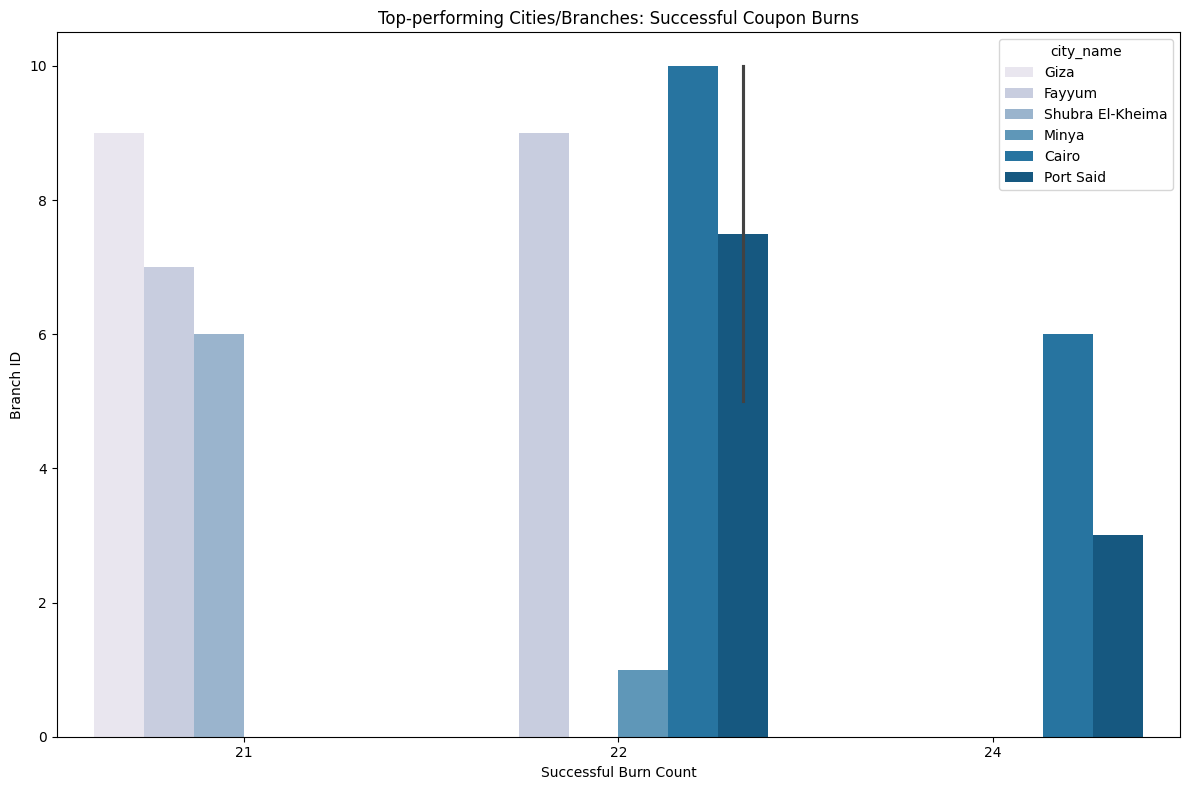

In [379]:
# Top-performing Cities/Branches: Successful Coupon Burns

# Filter and count the successful coupon burns (burned status)
top_cities_branches_sorted = main_df[main_df['transaction_status'] == 'burned'] \
    .groupby(['city_name', 'branch_id'])['transaction_id'] \
    .count() \
    .reset_index(name='successful_burn_count') \
    .sort_values(by='successful_burn_count', ascending=False)

# Select top 10 for better visualization
top_cities_branches_sorted = top_cities_branches_sorted.head(10)

# Plot for Top-performing Cities/Branches (Successful Coupon Burns)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities_branches_sorted, x='successful_burn_count', y='branch_id', hue='city_name', dodge=True, palette='PuBu')
plt.title('Top-performing Cities/Branches: Successful Coupon Burns')
plt.xlabel('Successful Burn Count')
plt.ylabel('Branch ID')
plt.tight_layout()
plt.show()

- Cairo Branch (ID: 6) recorded the highest number of successful coupon burns with 24 coupons, followed by Cairo Branch (ID: 10) with 22 coupons.
  - These figures suggest that Cairo is one of the top cities with significant coupon consumption, with a well-distributed performance across its branches.

- Port Said also showed strong performance, with Port Said Branch (ID: 3) and Port Said Branch (ID: 10) both recording 22 successful coupon burns.
  - This highlights that Port Said branches are actively utilizing the coupons, indicating the effectiveness of the promotions in this region.

- Both Minya Branch and Fayyum Branch also registered 22 successful coupon burns, reflecting good participation in coupon usage.
  - This suggests that these cities not only show solid engagement with the coupons but also have branches with concentrated high performance.

- Coupon consumption is not limited to a single city; there is noticeable variation in performance across branches in major cities like Cairo and Port Said, indicating that different branches contribute significantly to coupon usage.
  - This distribution suggests that the marketing efforts are well spread across various regions, promoting balanced engagement with the offers.